**Junaid Iqbal Khan**

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2 

def RGBtoGRAY(image):
    return np.dot(image[...,:3], [0.3, 0.5, 0.2])


imagep = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/lena.bmp')# My reference Image
image=RGBtoGRAY(imagep)
plt.figure()
plt.title('Reference Image')
plt.imshow(imagep)
plt.figure()

TypeError: ignored

## **Task#1**

# Harris Detector

In [ ]:
def gauss_kernel(size, sigma):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    gnormal =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return gnormal


# Defining a filter

def filter(image, kernel):

    # Convolution with vertical mask
    kernel = np.flipud(np.fliplr(kernel))

    x_K = kernel.shape[0] 
    y_K = kernel.shape[1] 
    x_I = image.shape[0] 
    y_I = image.shape[1]
    x_O = int(x_I -x_K  + 1)
    y_O = int(y_I -y_K + 1)
    output = np.zeros((x_O, y_O))
    for i in range(y_O):
        for j in range(x_O):
            output[j][i] = (kernel * image[j: j + x_K, i: i + y_K]).sum()
    return output
# Denoising of image using Gaussian blur, as edge detection is sensitive to noise
kernel=gauss_kernel(10,1);
image_g=filter(image,kernel)

# Defining vertical Sobel Mask
kernel_vert = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)

#Defining horizonatal Sobel Mask
kernel_horz = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)


# Applying vertical Sobel Mask
kernel=kernel_vert
new_image_sobel_Y=filter(image,kernel)


# Applying vertical Sobel Mask
kernel=kernel_horz
new_image_sobel_X=filter(image,kernel)


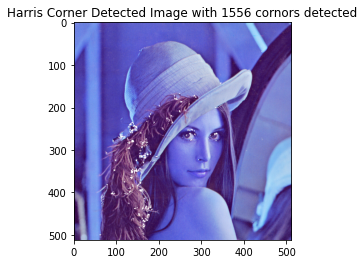

In [ ]:
imagep = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lena.png')# My reference Image
image=RGBtoGRAY(imagep)




IxIx = new_image_sobel_x * new_image_sobel_x
IyIy = new_image_sobel_y * new_image_sobel_y
IxIy = new_image_sobel_x * new_image_sobel_y

height, width = image.shape

window_size = 5
offset = int(window_size/2)
k=0.2


quotient = np.zeros(image.shape)

for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        window_IxIx = IxIx[y-offset:y+offset+1, x-offset:x+offset+1]
        window_IyIy = IyIy[y-offset:y+offset+1, x-offset:x+offset+1]
        window_IxIy = IxIy[y-offset:y+offset+1, x-offset:x+offset+1]

        Mxx = window_IxIx.sum()
        Myy = window_IyIy.sum()
        Mxy = window_IxIy.sum()


        det = Mxx*Myy - Mxy*Mxy
        trace = Mxx + Myy

        quotient[y,x] = det-k*trace**2 

threshold=0.009
count=0


for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        if quotient[y, x]/quotient.max() > threshold:
            count=count+1
            imagep.itemset((y, x, 0), 255)
            imagep.itemset((y, x, 1), 255)
            imagep.itemset((y, x, 2), 255)


plt.figure()
plt.title('Harris Corner Detected Image with %1.0f' %count + ' cornors detected')
plt.imshow(imagep)




In [ ]:
quotient.max()

528580644528.2876

In [ ]:
print(quotient.shape)

(512, 512)


## SUSAN Detector

In [ ]:
def filterDeSusan():
    mask=np.ones((7,7))
    mask[0,0]=0
    mask[0,1]=0
    mask[0,5]=0
    mask[0,6]=0
    mask[1,0]=0
    mask[1,6]=0
    mask[5,0]=0
    mask[5,6]=0
    mask[6,0]=0
    mask[6,1]=0
    mask[6,5]=0
    mask[6,6]=0
    return mask

def detectionDeSusan(img):
    img = img.astype(np.float64)
    # threshold
    threshold=5
    circularMask=filterDeSusan()

    output=np.zeros(img.shape)

    count=0
    for i in range(3,img.shape[0]-3):
        for j in range(3,img.shape[1]-3):
            ir=np.array(img[i-3:i+4, j-3:j+4])
            ir =  ir[circularMask==1]
            ir0 = img[i,j]
            area=np.sum(np.exp(-((ir-ir0)/10)**6))
            if area<=threshold:
                count=count+1
                area=threshold-area
            else:
                area=0
            output[i,j]=area
    return output,count




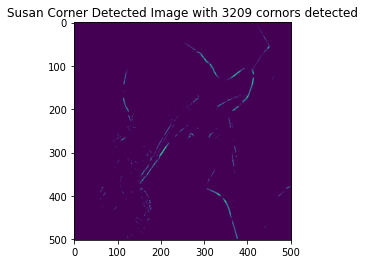

In [ ]:
imagep = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lena.png')# My reference Image
image=RGBtoGRAY(imagep)


# Denoising of image using Gaussian blur, as edge detection is sensitive to noise
kernel=gauss_kernel(10,1);
image_g=filter(image,kernel)


image_susan,count=detectionDeSusan(image_g)
plt.figure()
plt.title('Susan Corner Detected Image with %1.0f' %count + ' cornors detected')
plt.imshow(image_susan)

## Moravec Detector

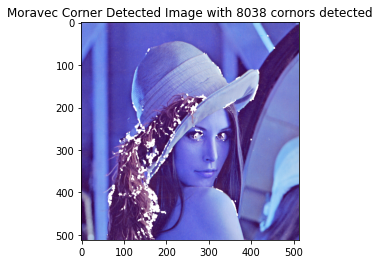

In [ ]:
imagep = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lena.png')# My reference Image
image=RGBtoGRAY(imagep)


height, width = image.shape

img=image

window_size = 5




quotient = np.zeros(image.shape)

normal = 1 
offset = 0
count=0

thresholder=5000

for y in range(3, height-3):
    for x in range(3, width-3):
        offset=2
        window_1= np.multiply(np.exp(-(((np.arange(-2,3,1))**2 + (np.arange(-2,3,1))**2) / (2.0*sigma**2))) * normal,(img[y-offset:y+offset+1, x-offset+1:x+offset+1+1]-img[y-offset:y+offset+1, x-offset:x+offset+1])**2)
        window_2= np.multiply(np.exp(-(((np.arange(-2,3,1))**2 + (np.arange(-2,3,1))**2) / (2.0*sigma**2))) * normal,(img[y-offset+1:y+offset+1+1, x-offset+1:x+offset+1+1]-img[y-offset:y+offset+1, x-offset:x+offset+1])**2)
        window_3= np.multiply(np.exp(-(((np.arange(-2,3,1))**2 + (np.arange(-2,3,1))**2) / (2.0*sigma**2))) * normal,(img[y-offset+1:y+offset+1+1, x-offset:x+offset+1]-img[y-offset:y+offset+1, x-offset:x+offset+1])**2)
        window_4= np.multiply(np.exp(-(((np.arange(-2,3,1))**2 + (np.arange(-2,3,1))**2) / (2.0*sigma**2))) * normal,(img[y-offset+1:y+offset+1+1, x-offset-1:x+offset+1-1]-img[y-offset:y+offset+1, x-offset:x+offset+1])**2)


        M1 = window_1.sum()
        M2 = window_2.sum()
        M3 = window_3.sum()
        M4 = window_4.sum()


        if min(M1,M2,M3,M4) > thresholder:
            count=count+1
            imagep.itemset((y, x, 0), 255)
            imagep.itemset((y, x, 1), 255)
            imagep.itemset((y, x, 2), 255)




plt.figure()
plt.title('Moravec Corner Detected Image with %1.0f' %count + ' cornors detected')
plt.imshow(imagep)

## **Task #2**

In [ ]:
def gauss_kernel(size, sigma):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    gnormal =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return gnormal


# Defining a filter

def filter(image, kernel):

    # Convolution with vertical mask
    kernel = np.flipud(np.fliplr(kernel))

    x_K = kernel.shape[0] 
    y_K = kernel.shape[1] 
    x_I = image.shape[0] 
    y_I = image.shape[1]
    x_O = int(x_I -x_K  + 1)
    y_O = int(y_I -y_K + 1)
    output = np.zeros((x_O, y_O))
    for i in range(y_O):
        for j in range(x_O):
            output[j][i] = (kernel * image[j: j + x_K, i: i + y_K]).sum()


    return output
  

In [ ]:
imagep = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lena.png')# My reference Image
image=RGBtoGRAY(imagep)

# Denoising of image using Gaussian blur, as edge detection is sensitive to noise
kernel=gauss_kernel(10,1);
image_g=filter(image,kernel)

# Defining vertical Sobel Mask
kernel_vert = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)

#Defining horizonatal Sobel Mask
kernel_horz = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)


# Applying vertical Sobel Mask
kernel=kernel_vert
new_image_sobel_Y=filter(image,kernel)


# Applying vertical Sobel Mask
kernel=kernel_horz
new_image_sobel_X=filter(image,kernel)

# Gradiant Map
gradient_mag = np.sqrt(np.square(new_image_sobel_X) + np.square(new_image_sobel_Y))
gradient_mag *= 255.0 / gradient_mag.max()


In [ ]:
# Edge Strength Map via non-maximum supression

def non_max_suppression(image, theta_mag):
    M, N = image.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = theta_mag * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
                q = 255
                r = 255
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = image[i, j+1]
                    r = image[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = image[i+1, j-1]
                    r = image[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = image[i+1, j]
                    r = image[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = image[i-1, j-1]
                    r = image[i+1, j+1]

                if (image[i,j] >= q) and (image[i,j] >= r):
                    Z[i,j] = image[i,j]
                else:
                    Z[i,j] = 0
    return Z

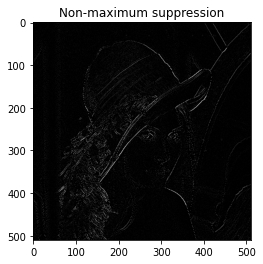

In [ ]:
theta_mag = np.arctan2(new_image_sobel_Y, new_image_sobel_X)
edge_strength=non_max_suppression(gradient_mag,theta_mag)

plt.imshow(edge_strength, cmap='gray')
plt.title("Non-maximum suppression")
plt.show()

## **Task #03**

In [ ]:
def gauss_kernel(size, sigma):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    gnormal =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return gnormal


# Defining a filter

def filter(image, kernel):

    # Convolution with vertical mask
    kernel = np.flipud(np.fliplr(kernel))

    x_K = kernel.shape[0] 
    y_K = kernel.shape[1] 
    x_I = image.shape[0] 
    y_I = image.shape[1]
    x_O = int(x_I -x_K  + 1)
    y_O = int(y_I -y_K + 1)
    output = np.zeros((x_O, y_O))
    for i in range(y_O):
        for j in range(x_O):
            output[j][i] = (kernel * image[j: j + x_K, i: i + y_K]).sum()
    return output



def GOF(image,num_oct,num_im,size,sigma):
  images = []
  a=np.array([2])
  for l in range(1,num_oct+1):
    new=image[0:-1:l,0:-1:l]
    sigmap=sigma
    sizep=size
    for k in range(1,num_im+1):
      kernel=gauss_kernel(sizep, sigmap)
      newp = filter(new, kernel)
      images.append(newp)
      sigmap=sigmap-1
      sizep=sizep


  return images


def GOF_2(images,num_im):
    images_new=[]
    for i in range(1,len(images)):
        if (i)%num_im!=0:
            image1=images[i-1]
            image2=images[i]
            image_new=np.subtract(image2,image1)
            images_new.append(image_new)
            images_new.append(image_new)
        else:
            break

 
    return images_new



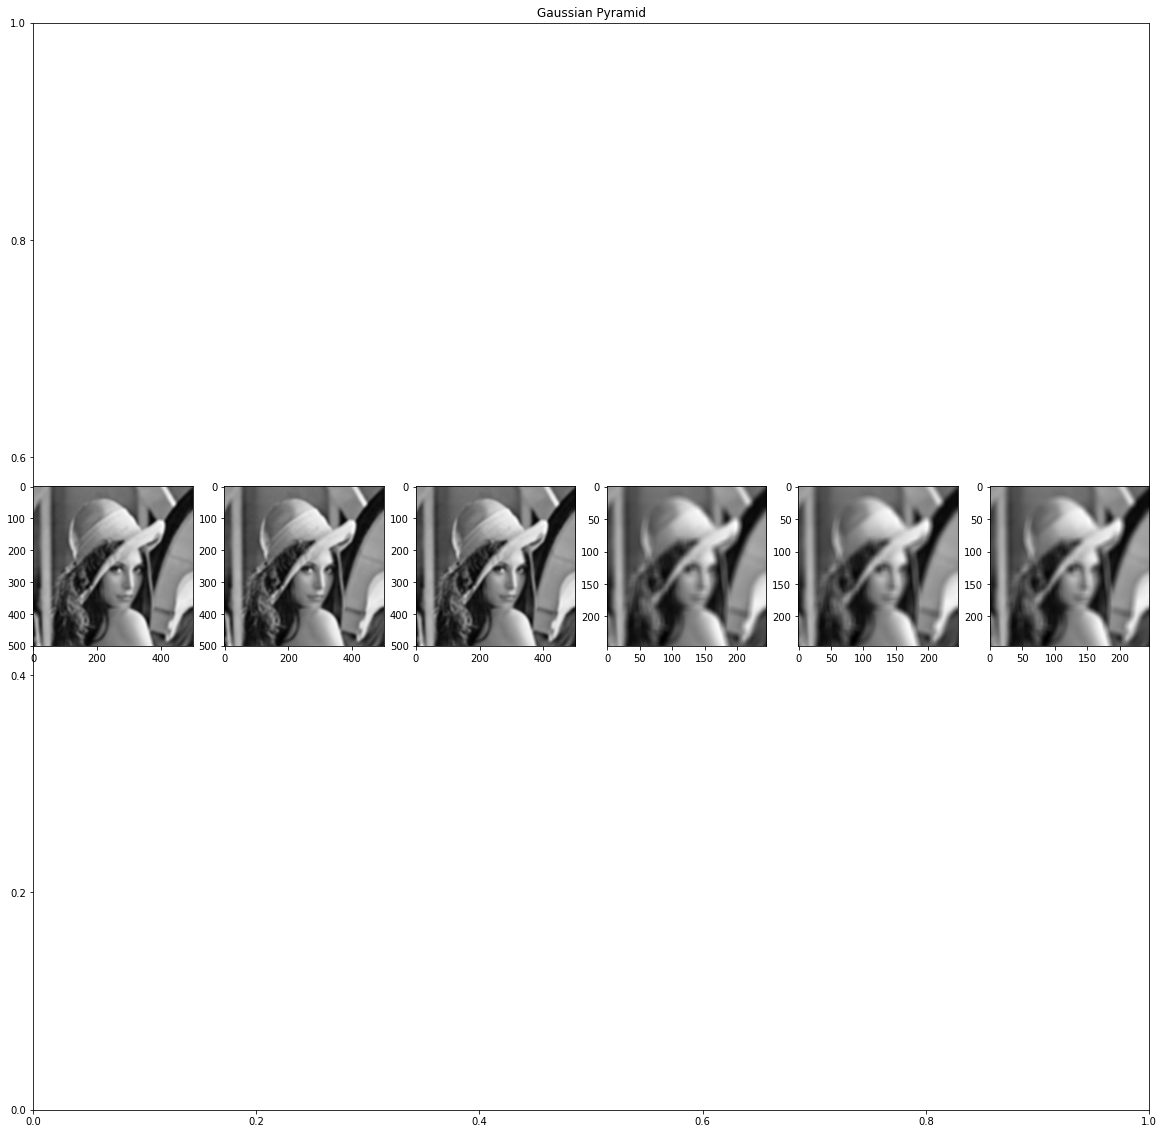

In [ ]:

imagep = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lena.png')# My reference Image
image=RGBtoGRAY(imagep)

number_of_octaves=2
number_of_images=3
size_of_filter=10
sigma=10;

images=GOF(image,number_of_octaves,number_of_images,size_of_filter,sigma)
images_2=GOF_2(images,number_of_images)
w=10
h=10
fig=plt.figure(figsize=(20, 20))
rows = 1
columns = number_of_images*number_of_octaves

plt.figure
plt.title("Gaussian Pyramid")
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i-1],cmap='gray')
plt.show()


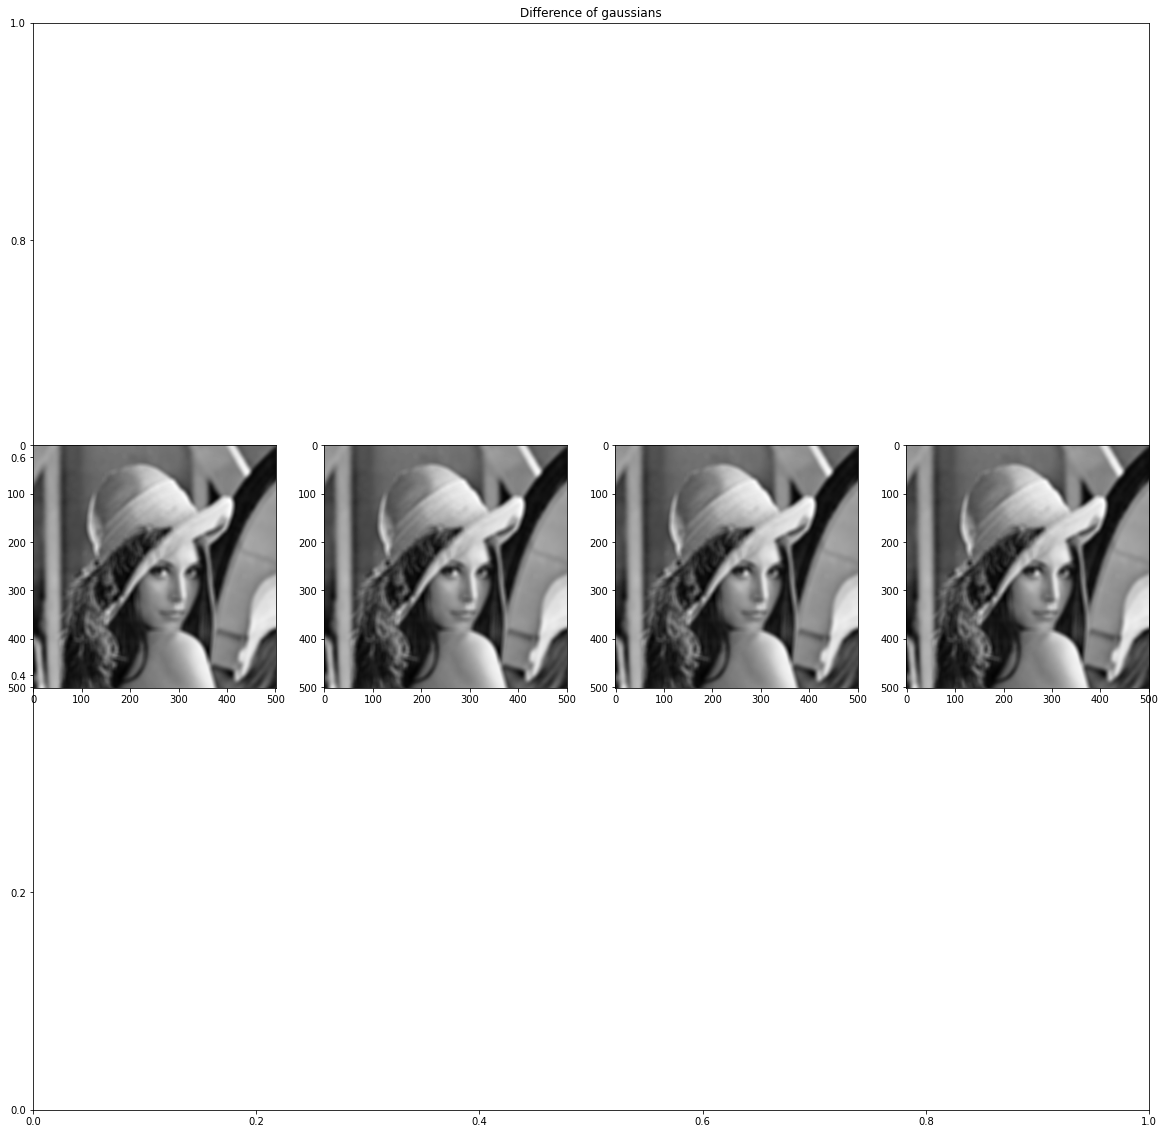

In [ ]:
w=10
h=10
fig=plt.figure(figsize=(20, 20))
rows = 1
columns = (number_of_images-1)*number_of_octaves

plt.figure
plt.title("Difference of gaussians")
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images_2[i-1],cmap='gray')
plt.show()